In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv("Mall_Customers.csv")
print(df.head())
print(df.shape)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Preprocessing

In [8]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values
print("First 5 data points:\n", X[:5])

First 5 data points:
 [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


### Visualize Raw Data

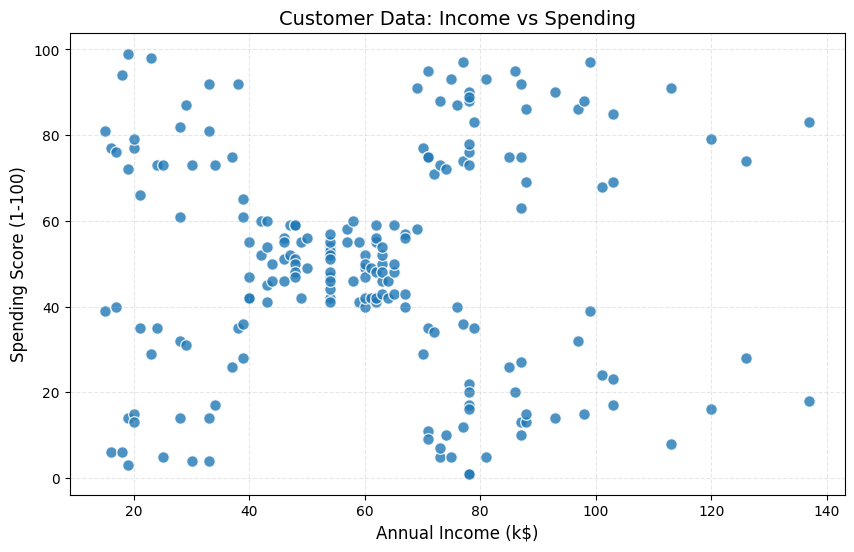

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=70, alpha=0.8, edgecolors='w')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Data: Income vs Spending', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("K-Means_raw_data.png", dpi=300, bbox_inches='tight')
plt.show()

###  Initial K-Means Clustering

In [22]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=5, random_state= 42)
cluster_labels = kmeans.fit_predict(X)

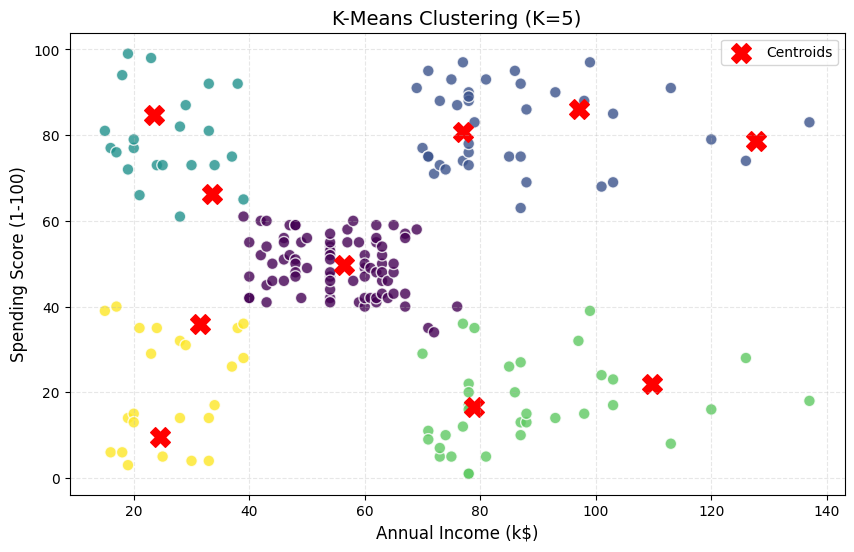

In [27]:
# Plot clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=70, cmap='viridis', alpha=0.8, edgecolors='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, marker='X', c='red', label='Centroids')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering (K=5)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("kmeans_clusters.png", dpi=300, bbox_inches='tight')

plt.show()

### Elbow Method to find optimal K

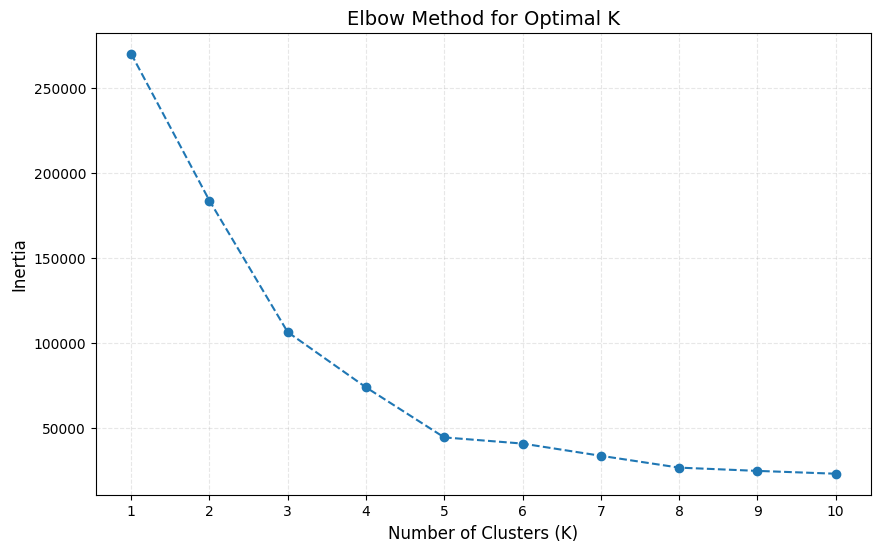

In [32]:
# Calculate inertia for K=1 to K=10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("elbow_method.png", dpi=300, bbox_inches='tight')

plt.show()

### Silhouette Score

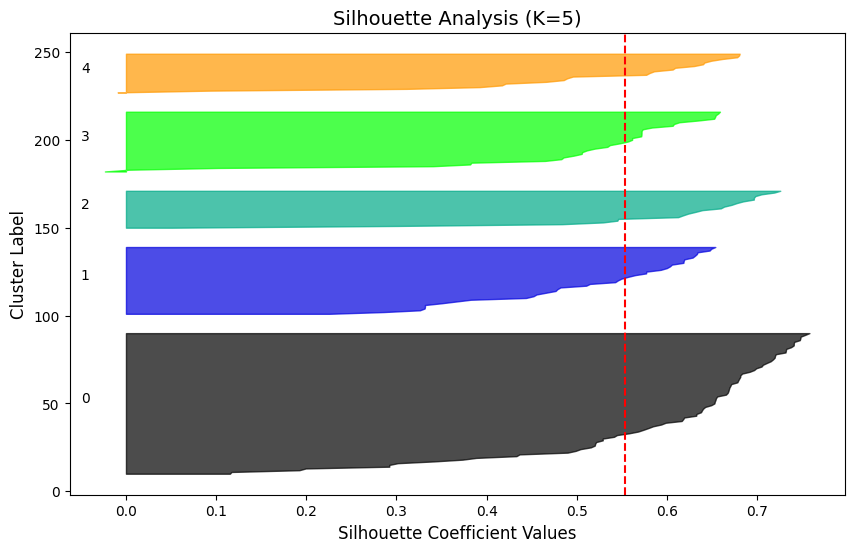

Average Silhouette Score for K=5: 0.554


In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Optimal K from Elbow Method
optimal_k = 5

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Compute silhouette scores
clusterer = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = clusterer.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Visualize
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                   0, ith_cluster_silhouette_values,
                   facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette Coefficient Values", fontsize=12)
ax.set_ylabel("Cluster Label", fontsize=12)
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title(f"Silhouette Analysis (K={optimal_k})", fontsize=14)
plt.savefig("silhouette_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Average Silhouette Score for K={optimal_k}: {silhouette_avg:.3f}")